# Intro to Dynamic Programming
**Overview.** This lecture covers basic concepts from Dynamic Programming. The exposition follows Adda and Cooper (2003).<sup>1</sup> A more in depth treatment can be found in Stokey and Lucas (1989).<sup>2</sup>

## The Bellman Equation
Let $\tilde\sigma(s_t,c_t)$ denote the payoff to an agent. $s_t$ is a state vector which is a set of variables that affect payoffs but that the agent has no influence over contemporaneously. The agent can choose the control $c_t$ to influence the *evolution* of the state through the transition equation $s_{t+1} = \tau(s_t,c_t)$. Letting $V(s_0)$ denote the maximized value of
$$\sum_{t=0}^\infty\beta^t\tilde\sigma(s_t,c_t)$$
The principle of optimality is concisely stated in the *Bellman Equation*
$$V(s) = \max_{c\in C(s)}\left\{\tilde\sigma(s,c) + \beta V(s')\right\}\quad\text{all } s\in S$$
such that $s' = \tau(s,c)$. Note that the set of choices for the control may depend on $s$. One can write this more compactly as
$$V(s) = \max_{s'\in \Gamma(s)}\left\{\sigma(s,s') + \beta V(s')\right\}\quad\text{all } s\in S$$
where the control is the future state.
## Two Theorems

**Existence Theorem.** If $\sigma(s,s')$ is real-valued, continuous and bounded with $\beta\in(0,1)$ and the constraint set $\Gamma(s)$ is nonempty, compact-valued and continuous then there exists a unique solution to the Bellman equation.

**Pf.** See SL theorem 4.6. The basic idea is to show that the Bellman equation is a contraction using Blackwell's sufficient conditions. Then, taking as given that the set of continuous and bounded functions is a complete metric space (sup norm), we can apply to the contraction mapping theorem.

**Shape Theorem.** Assume that $\sigma(s,s')$ is real-valued, continuous, concave and bounded. Let $\beta\in(0,1)$ and $S$ be a convex subset of $\mathbb{R}^n.$ Lastly, assume that the constraint set is nonempty, compact-valued, convex and continuous. Then the unique solution to the Bellman equation is concave and the associated policy correspondence is in fact a policy function.

**Pf.** See SL theorem 4.8.

**Differentiability and Envelope Theorem.** See SL theorem 4.11.

**Stochastic Case.** We add shocks $\varepsilon\in\Psi$ to the state vector. $\Psi$ is a finite set and follows a Markov process with transition
$$\pi_{ij} = P(\varepsilon'=\varepsilon_j|\varepsilon =\varepsilon_i).$$
This is not so restrictive since if $\epsilon'$ is correlated with shocks from a previous period we can just add these to the state vector and retrieve another Markov process. Secondly, the finiteness (or more generally countability) of the shocks is important. Whenever we have continuous processes we can use numerical methods to discretize them. Now the Bellman is
$$V(s,\varepsilon) = \max_{s'\in\Gamma(s)}\left\{\sigma(s,s') + \mathbb{E}_{\varepsilon'|\varepsilon}(s',\varepsilon')\right\}\quad\text{all } (s,\varepsilon)$$

The same contraction mapping reasoning can be applied to yield existence. Adda and Cooper argue for the existence of a policy function using the envelope condition and deriving an Euler equation.

## References
1. Adda, J., & Cooper, R. W. (2003). Dynamic Economics: Quantitative Methods and Applications. MIT Press.
2. Stokey, N. L., & Lucas Jr, R. E. (1989). Recursive Methods in Economic Dynamics. Harvard University Press.

# Ex. The Cake Eating Problem
The code for this problem follows along with the two [QuantEcon lectures](https://python.quantecon.org/intro.html) on cake eating problems.

## Environment
Suppose you are endowed with a quantity of cake $\bar x$ today, $t=0$. You are immortal so that $t\in\{0,1,\ldots\}$. A quantity $c$ of consumed cake yields
$$u(c) = \frac{c^{1-\gamma}}{1-\gamma},\quad\gamma>0 \text{ and }\gamma\neq1$$

We can state the problem in terms of choosing an optimal sequence of consumption
$$
\begin{align*}
v(x_0) \quad=\quad &\max_{\{c_t\}_{t=0}^\infty}\quad\sum_{t=0}^\infty \beta^tu(c_t)\quad\text{s.t.}\\
& x_{t+1} = x_t - c_t, \quad 0\leq c_t\leq x_t.
\end{align*}
$$
Or recursively
$$
\begin{align*}
v(x) = \max_c\{u(c) + \beta v(x-c)\}
\end{align*}
$$
This is one of the few dynamic programs that can be solved in closed form
$$v^*(x_t) = (1 - \beta^{1/\gamma})^{-\gamma}u(x_t)$$

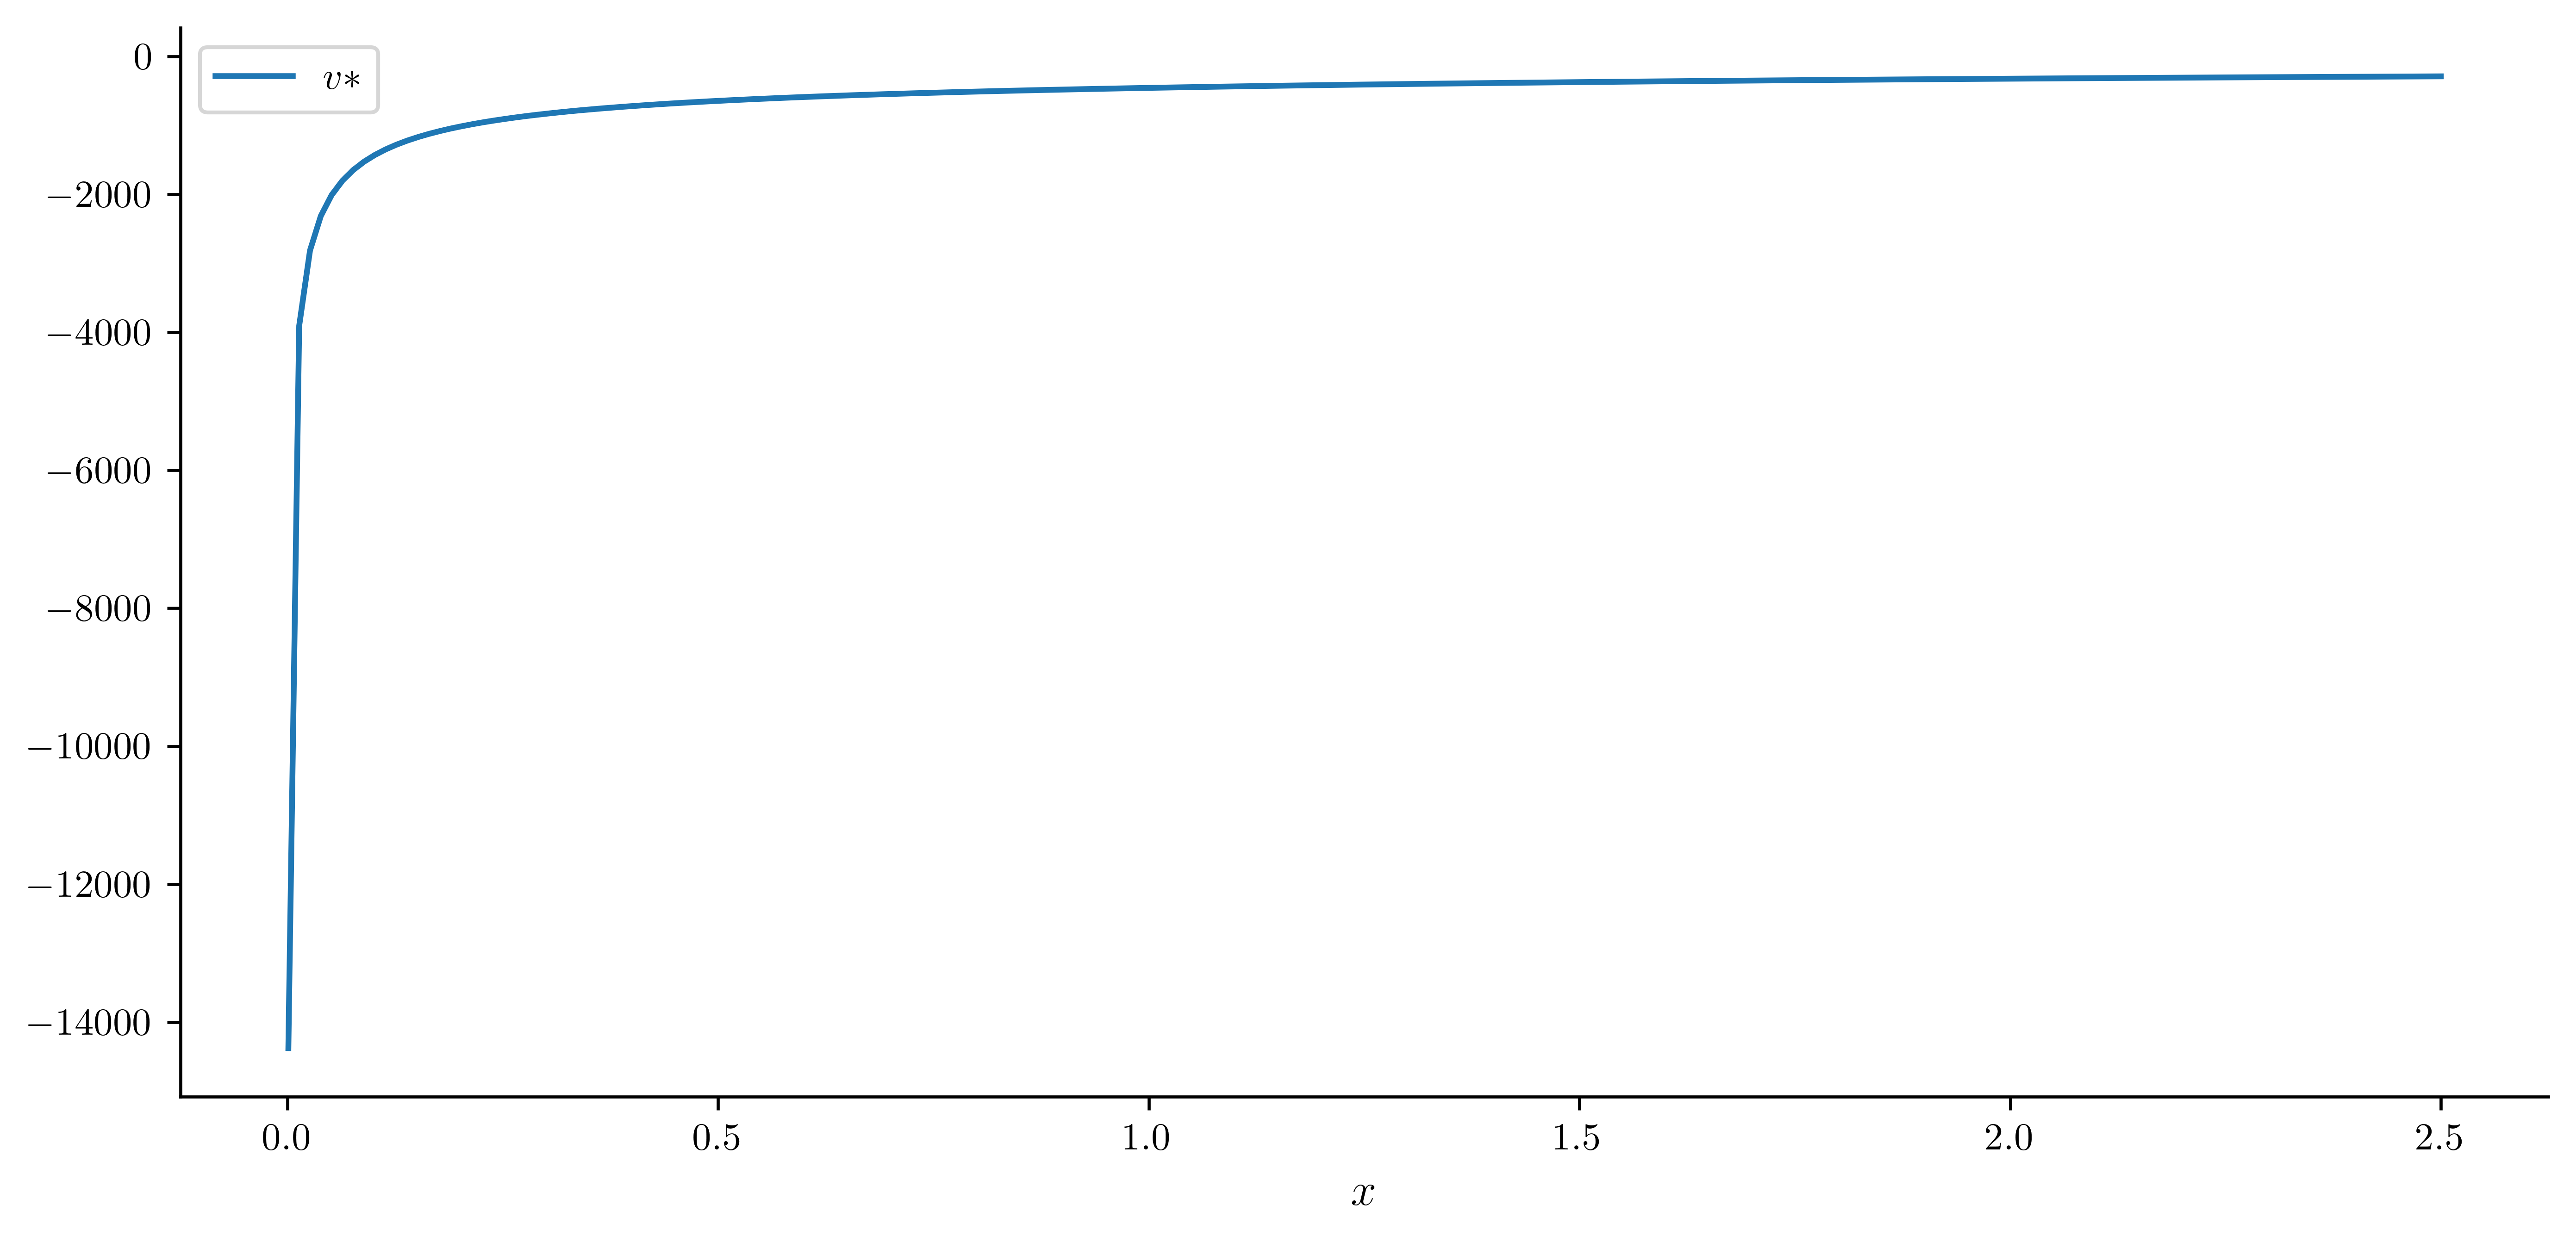

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                     # So that we can despine plots
from DP_intro import *

plt.rcParams["figure.figsize"] = (11, 5)  # set default figure size
plt.rcParams['figure.dpi'] = 600          # Sharpens up the plots
plt.rcParams['text.usetex'] = True        # Use LaTeX
plt.rcParams['font.family'] = 'serif'     # Use LaTeX's classic font

ce = CakeEating()               # Create instance of Cake Eating object
x_grid = ce.x_grid              # Take the default x_grid

fig, ax = plt.subplots()
ax.plot(x_grid, ce.v_star(x_grid), label = '$v*$')
ax.set_xlabel('$x$', fontsize = 12)
ax.legend()
sns.despine()

And now that we have an expression for the value function we can plug it into the Bellman equation and solve for the policy function,
$$c(x)\quad:=\quad\text{arg}\max_c\left\{u(c) + \beta v^*(x-c)\right\}$$
which after taking first order conditions yields
$$c(x) = (1 - \beta^{1/\gamma})x$$
Let's look at what happens as we vary the parameters.

# Euler Equation
The Euler equation is a necessary condition for an optimal policy. Every theory of dynamic optimization (Lagrangian, variational, Dynamic Programming) that I am aware of provides a way to the Euler equation.

In Dynamic programming the Euler equation is viewed as a functional equation and gives us yet more ways to solve for optimal policies numerically. Furthermore, it characterizes optimal behavior in the truest sense of the word; reading the Euler equation will give you insight into exactly was an optimal policy *does*.

To derive it, let $c(x)$ be the policy function. Notice that,
$$\begin{align*}
v(x)\quad&=\quad u(c(x)) + \beta v(x - c(x))\\
\implies\frac{\partial v(x)}{\partial x}\quad&=\quad \frac{\partial u}{\partial c} \cdot \frac{\partial c}{\partial x} + \beta \frac{\partial v}{\partial x}\cdot\left(1 - \frac{\partial c}{\partial x}\right)\\
&= \underbrace{\left(\frac{\partial u}{\partial c} - \beta \frac{\partial v}{\partial x}\right)}_{=0}\frac{\partial c}{\partial x} + \beta\frac{\partial v}{\partial x}
\end{align*}$$

But, not only did the first order condition get us here, it also tells us that
$$u'(c) = \beta \frac{\partial v(x)}{\partial x} = v'(x)$$

Then the Euler equation is an expression of the first order condition with what we know from the Envelope condition,
$$u'(c) = \beta u'(x - c)$$

# Numerical Solution Methods
Now we can use numerical methods to solve this problem. While not necessary for this particular version of the problems, many problems will require numerical solutions. So, we will start introducing these methods here.

## Value Function Iteration
Define the Bellman operator
$$Tv = \max_{0\leq c\leq x}\{u(c) + \beta v(x - c)\}.$$
The algorithm here is to start with some initial guess $v$ and iterate using $T$ until convergence.

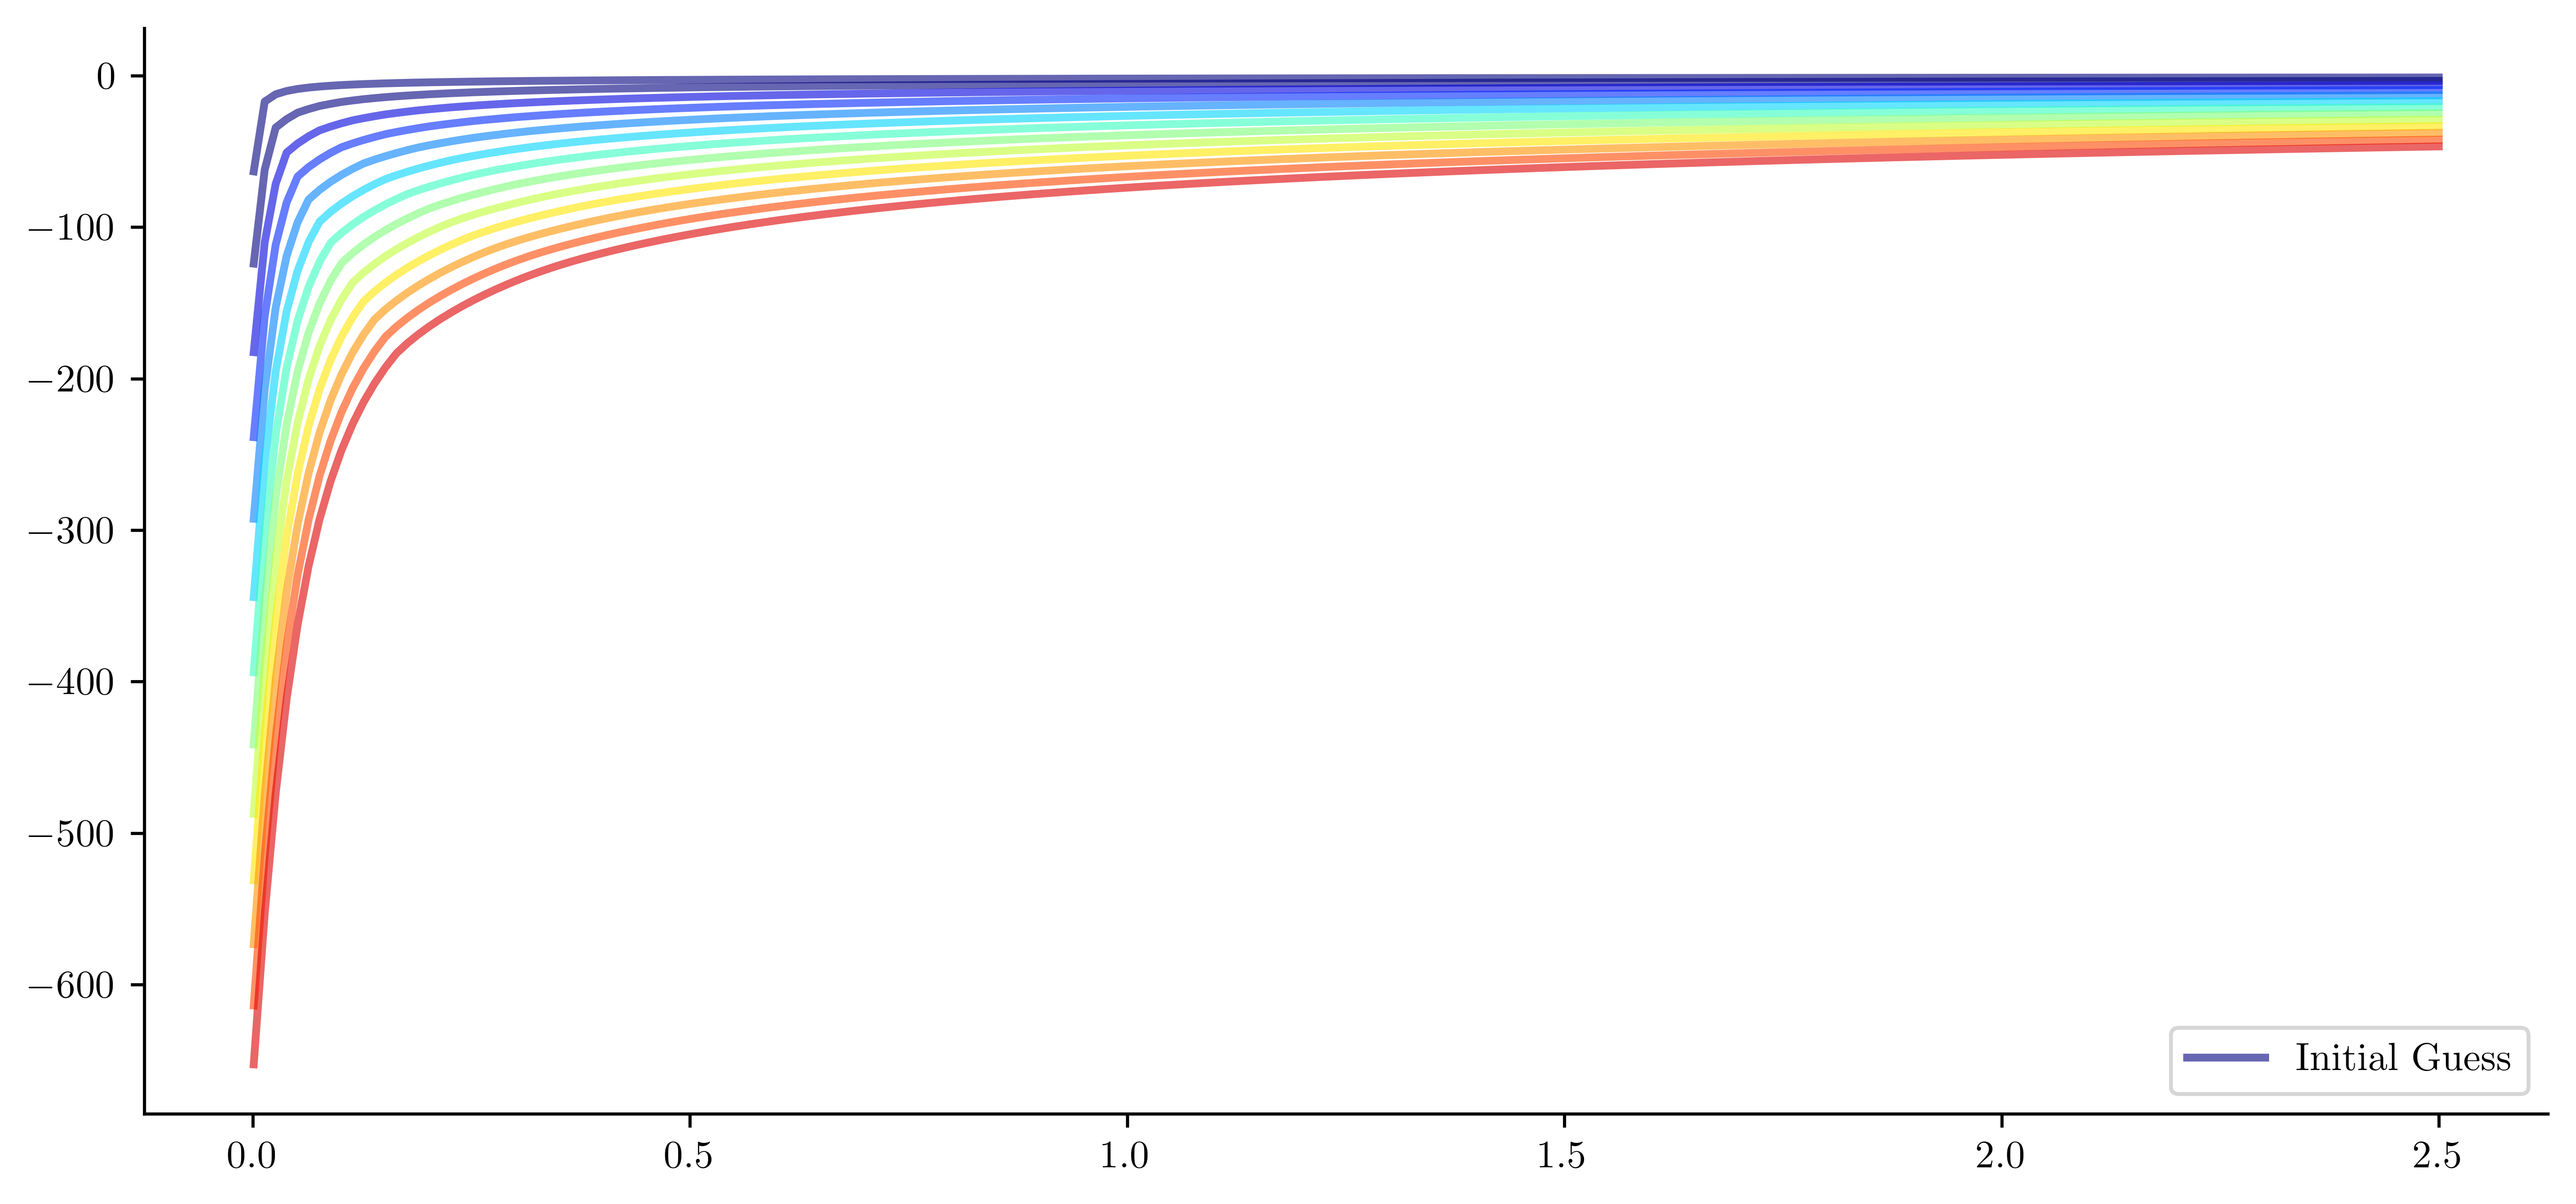

In [2]:
v = ce.u(x_grid)    # Initial guess
n = 12

fig, ax = plt.subplots()
ax.plot(x_grid, v, color = plt.cm.jet(0), lw = 2, alpha = 0.6, label = 'Initial Guess')
ax.legend()

# Plot 12 iterates of the Bellman operator
for i in range(n):
    v = ce.T(v)
    ax.plot(x_grid, v, color = plt.cm.jet(i/n), lw = 2, alpha = 0.6)

sns.despine()

# Value Function Iteration

In [4]:
v_star = ce.T_iter()

Error at iteration 25 is 23.8003755134813.
Error at iteration 50 is 8.577577195046615.
Error at iteration 75 is 3.091330659691039.
Error at iteration 100 is 1.1141054204751981.
Error at iteration 125 is 0.4015199357729671.
Error at iteration 150 is 0.14470646660583952.
Error at iteration 175 is 0.05215173547298946.
Error at iteration 200 is 0.018795314243106986.
Error at iteration 225 is 0.006773769545986852.
Error at iteration 250 is 0.002441244305884993.
Error at iteration 275 is 0.0008798164334962166.
Error at iteration 300 is 0.00031708295477983484.
Error at iteration 325 is 0.00011427565664234862.
Converged in 329 iterations.


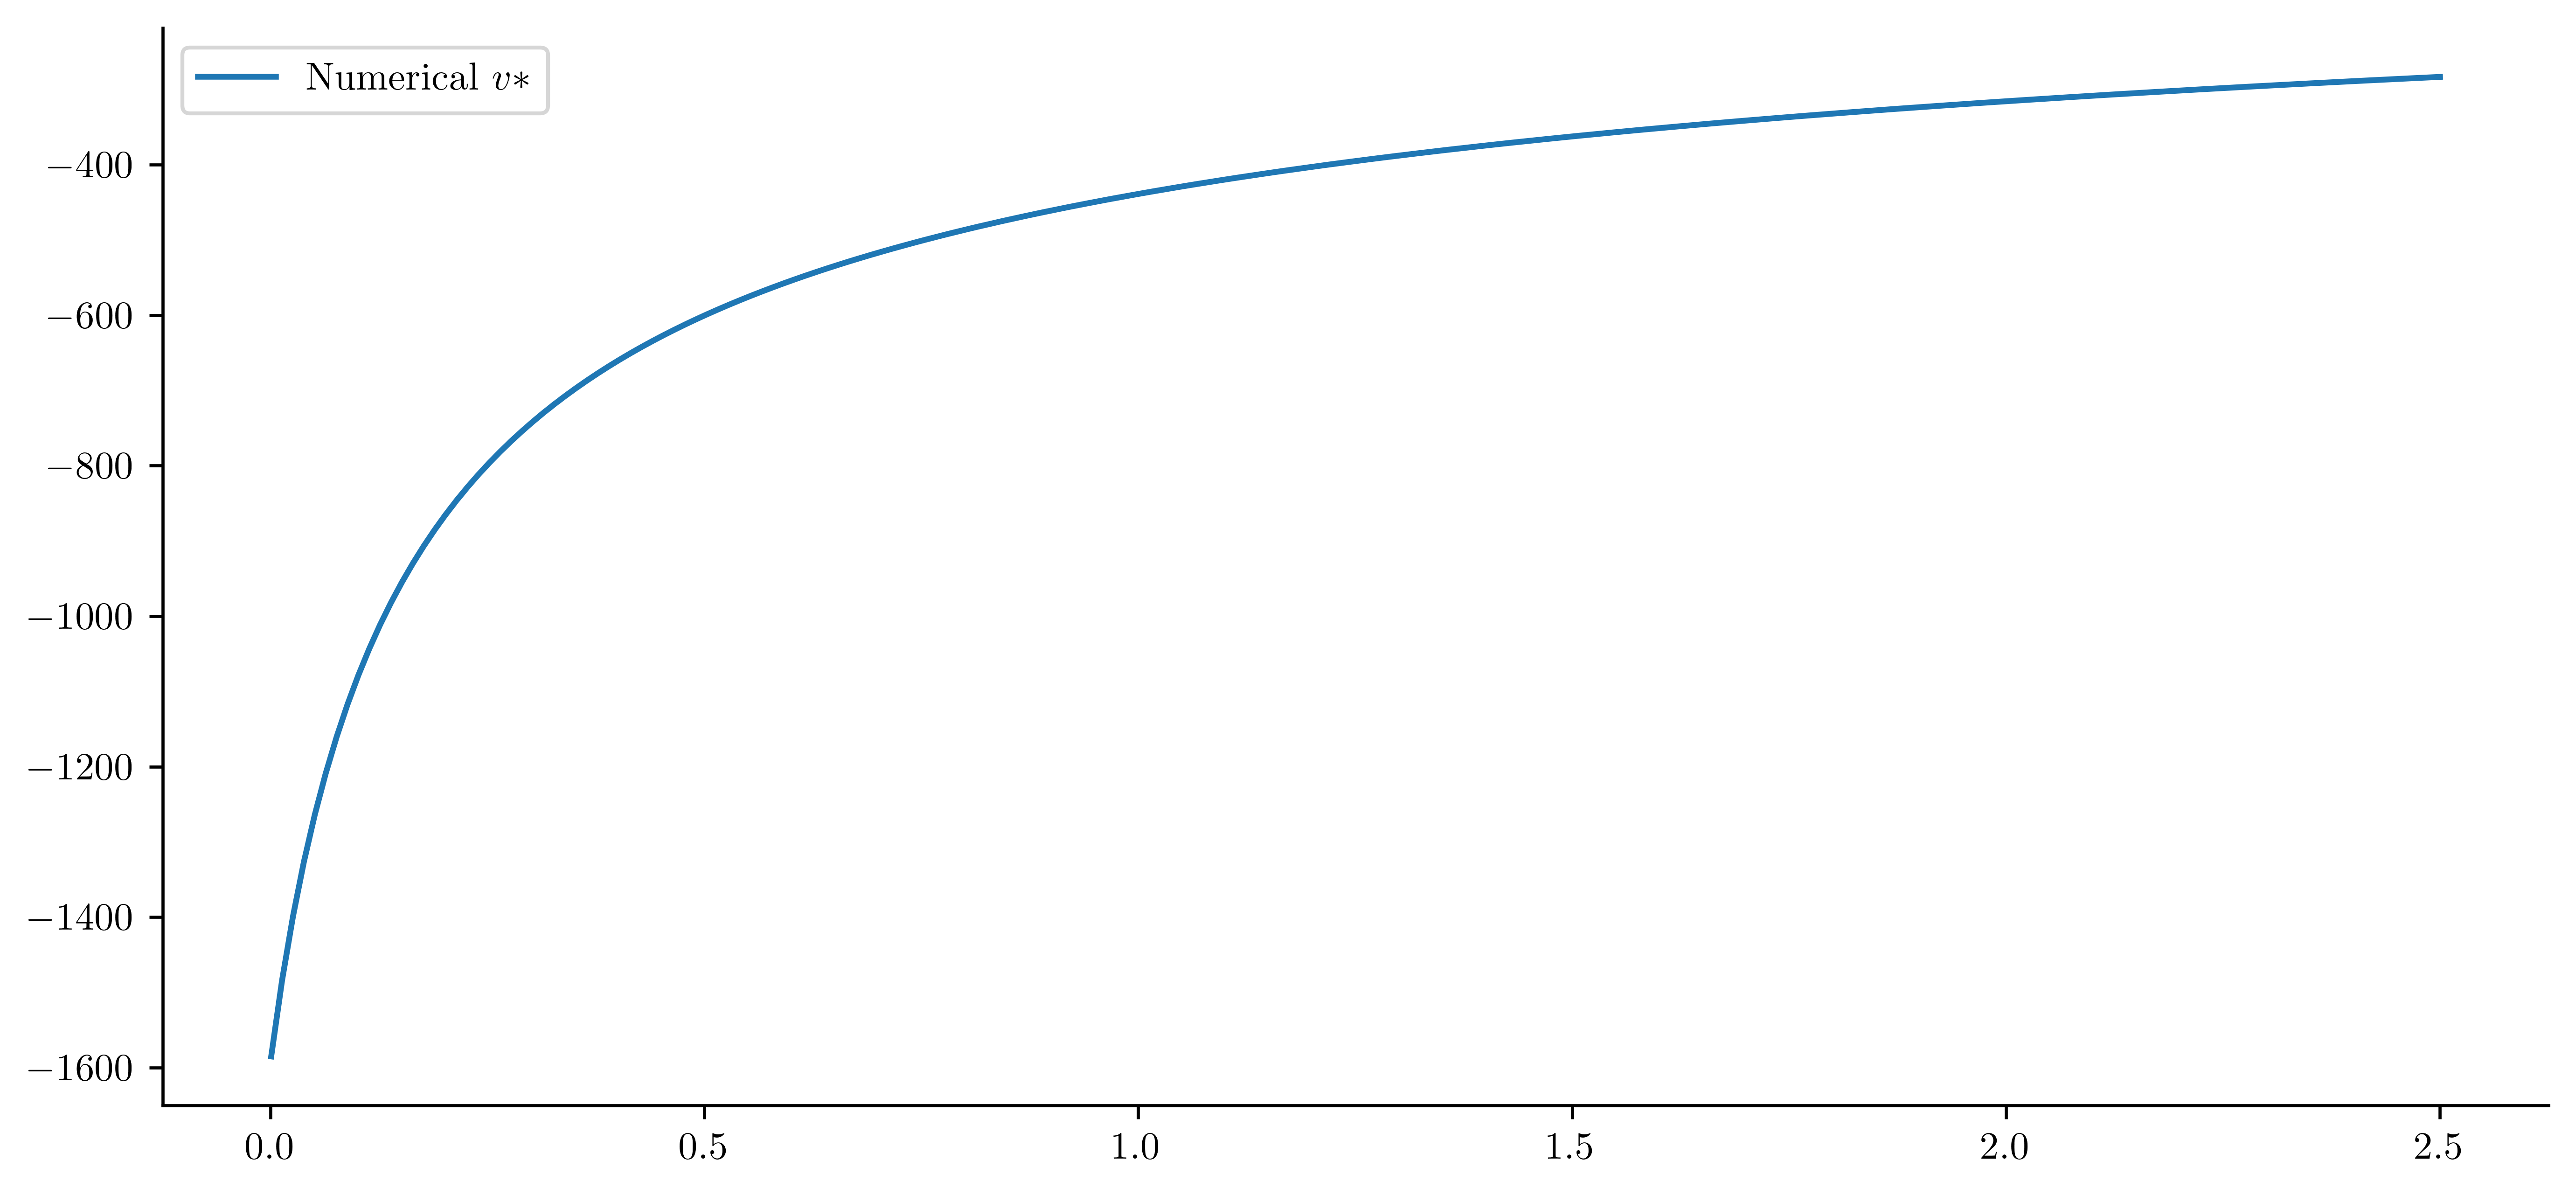

In [ ]:
fig, ax = plt.subplots()
ax.plot(x_grid, v_star, label = 'Numerical $v*$')
ax.legend()
sns.despine()

**Remark** Notice that the numerical solution does worse where there is a lot of curvature in the utility function and true solution. That is, near zero.